### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Exploring dataset

In [2]:
amazon = pd.read_csv('amazon_orders .csv', on_bad_lines='skip')
amazon.head()

/var/folders/cg/3bcrcktx2pd2r4xs8f88t3lc0000gn/T/ipykernel_23167/3103854846.py:1: DtypeWarning: Columns (16,17,18,19,22,26,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  amazon = pd.read_csv('amazon_orders .csv', on_bad_lines='skip')


,amazon_order_id,merchant_order_id,purchase_date,last_updated_date,order_status,fulfillment_channel,sales_channel,order_channel,url,ship_service_level,...,purchase_order_number,price_designation,fulfilled_by,is_iba,is_replacement_order,is_exchange_order,original_order_id,account_id,create_time,update_time
0,171-0003648-9448303,NaN,2023-12-16 06:56:41,2023-12-23 09:46:53,Shipped - Delivered to Buyer,Merchant,Amazon.in,WebsiteOrderChannel,NaN,Standard,...,NaN,NaN,Easy Ship,0.0,0,0,NaN,3.0,2024-01-18 03:04:28,2024-01-18 03:04:28
1,171-0007507-1641150,NaN,2022-11-07 12:21:38,2022-11-14 08:23:39,Shipped - Delivered to Buyer,Merchant,Amazon.in,WebsiteOrderChannel,NaN,Standard,...,NaN,NaN,Easy Ship,0.0,0,0,NaN,4.0,2024-01-18 03:10:56,2024-01-18 03:10:56
2,171-0009886-8466729,NaN,2022-11-20 15:35:45,2022-11-26 05:08:52,Shipped - Delivered to Buyer,Merchant,Amazon.in,WebsiteOrderChannel,NaN,Standard,...,NaN,NaN,Easy Ship,0.0,0,0,NaN,4.0,2024-01-18 03:10:56,2024-01-18 03:10:56
3,171-0012199-2736313,171-0012199-2736313,2024-03-29 12:10:38,2024-03-30 04:42:04,Shipped,Amazon,Amazon.in,NaN,NaN,Expedited,...,NaN,NaN,NaN,0.0,0,0,NaN,3.0,2024-04-13 10:08:25,2024-04-13 10:08:25
4,171-0014290-9993133,NaN,2023-03-17 14:30:17,2023-03-17 19:29:04,Cancelled,Merchant,Amazon.in,WebsiteOrderChannel,NaN,NextDay,...,NaN,NaN,NaN,0.0,0,0,NaN,5.0,2024-01-18 04:17:16,2024-01-18 04:17:16


In [3]:
amazon.shape

(46292, 40)

In [4]:
null_counts = amazon.isna().sum()
sorted_null_counts = null_counts.sort_values(ascending=False)

In [5]:
sorted_null_counts

url                        46292
purchase_order_number      46249
price_designation          46132
original_order_id          43770
fulfilled_by               33131
order_channel              25004
promotion_ids              23499
merchant_order_id          21288
currency                    6059
item_status                 3443
is_business_order            445
ship_country                 191
ship_postal_code             173
ship_state                   166
ship_city                    148
update_time                   66
account_id                    66
create_time                   66
is_iba                        65
is_replacement_order          65
is_exchange_order             65
item_price                    55
item_tax                      55
shipping_price                47
item_promotion_discount       47
quantity                      41
gift_wrap_tax                 31
asin                          23
ship_promotion_discount       23
gift_wrap_price               13
shipping_t

In [6]:
amazon['amazon_order_id'].value_counts()

amazon_order_id
404-3323408-1733944    7
403-2803244-6857138    6
406-8314783-7676334    6
403-6548855-6058728    4
403-0936670-2171569    4
                      ..
403-7903351-7375540    1
403-7904094-9403532    1
403-7908139-3669963    1
403-7910267-1215564    1
S02-9995555-6959151    1
Name: count, Length: 45844, dtype: int64

### Data Clearing

### Removal of Unwanted Columns and rows

In [7]:
amazon.drop(columns=['url', 'purchase_order_number', 'price_designation', 'original_order_id', 'fulfilled_by', 'promotion_ids', 'merchant_order_id','create_time','update_time','order_channel','amazon_order_id'], inplace=True)


In [8]:
amazon.head(1)

,purchase_date,last_updated_date,order_status,fulfillment_channel,sales_channel,ship_service_level,product_name,sku,asin,item_status,...,ship_promotion_discount,ship_city,ship_state,ship_postal_code,ship_country,is_business_order,is_iba,is_replacement_order,is_exchange_order,account_id
0,2023-12-16 06:56:41,2023-12-23 09:46:53,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Furshine Blue Drop Sofa Cover One 3 Seater and...,SOFA_COVER_BLUE_DROP_Pack3+1+1,B0CL6G575Z,Shipped,...,0,CALANGUTE,GOA,403516.0,IN,0,0.0,0,0,3.0


In [9]:
amazon['currency'].value_counts()

currency
INR                                                                40208
Easy Ship                                                             14
0                                                                     10
Amazon PLCC Free-Financing Universal Merchant AAT-EOKPWFWYW7Y6I        1
Name: count, dtype: int64

In [10]:
amazon

,purchase_date,last_updated_date,order_status,fulfillment_channel,sales_channel,ship_service_level,product_name,sku,asin,item_status,...,ship_promotion_discount,ship_city,ship_state,ship_postal_code,ship_country,is_business_order,is_iba,is_replacement_order,is_exchange_order,account_id
0,2023-12-16 06:56:41,2023-12-23 09:46:53,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Furshine Blue Drop Sofa Cover One 3 Seater and...,SOFA_COVER_BLUE_DROP_Pack3+1+1,B0CL6G575Z,Shipped,...,0,CALANGUTE,GOA,403516.0,IN,0,0.0,0,0,3.0
1,2022-11-07 12:21:38,2022-11-14 08:23:39,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Zhola Men's Premium PU-Leather Formal Belt (Co...,PU_BELT_BLA,B0B2997S7N,Shipped,...,0,Wangoi,MANIPUR,795130.0,IN,0,0.0,0,0,4.0
2,2022-11-20 15:35:45,2022-11-26 05:08:52,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Zhola Men's Premium PU-Leather Formal Belt (Co...,PU_BELT_BLA,B0B2997S7N,Shipped,...,0,Bengaluru,KARNATAKA,560043.0,IN,0,0.0,0,0,4.0
3,2024-03-29 12:10:38,2024-03-30 04:42:04,Shipped,Amazon,Amazon.in,Expedited,Furshine Blue Diamond Sofa Cover One 3 Seater ...,WC_SOFA_COVER_BLU_DIAMOND_Pack3+1+1,B0CKBXWH36,Shipped,...,0,Bhatinda,PUNJAB,151004.0,IN,0,0.0,0,0,3.0
4,2023-03-17 14:30:17,2023-03-17 19:29:04,Cancelled,Merchant,Amazon.in,NextDay,Boxn Mosquito Eco Friendly Electronic LED Mosq...,MOSQUITO_KILLER_LAMP_BLACK,B0BVMMQ8D9,NaN,...,0,Noida,UTTAR PRADESH,201304.0,IN,Easy Ship,0.0,0,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46287,2023-10-12 06:11:03,2023-10-22 15:00:12,Shipped,Amazon,Non-Amazon,Standard,-,PL1051_Pack2_11-12_FBA,B0BVFJB2W8,Unshipped,...,0,Delhi,Delhi,110041.0,IN,0,0.0,0.0,0.0,4.0
46288,2024-02-26 06:17:11,2024-02-26 06:37:31,Cancelled,Amazon,Non-Amazon,Standard,-,MFN_SOFA_COVER_BLUE_DROP_Pack3+1+1,B0CL6G575Z,Unshipped,...,0,New Delhi,DL,110041.0,IN,0,0.0,0.0,0.0,3.0
46289,2024-03-22 17:48:21,2024-03-28 04:16:13,Shipped,Amazon,Non-Amazon,Standard,-,WC_SOFA_COVER_BLEND_GEOMETRIC_Pack3+1+1,B0CKBV4Y74,Unshipped,...,0,New Delhi,Delhi,110041.0,IN,0,0.0,0.0,0.0,3.0
46290,2023-10-12 06:36:21,2023-10-23 11:09:14,Shipped,Amazon,Non-Amazon,Standard,-,PL1212B_Pack1-19_fba,B0BZDFFLTB,Unshipped,...,0,Delhi,Delhi,110041.0,IN,0,0.0,0.0,0.0,4.0


In [11]:
#Order status is superset of itemstatus
amazon.drop(columns=['item_status'], inplace=True)

In [12]:
amazon['sales_channel'].value_counts()

sales_channel
Amazon.in     45401
Non-Amazon      891
Name: count, dtype: int64

In [13]:
amazon['ship_country'].value_counts()

ship_country
IN    46101
Name: count, dtype: int64

In [14]:
#All are same value no trend change to analyse hence removing it
amazon.drop('ship_country', axis=1,inplace=True)

In [15]:
#inovance from amazon is not conatined in other dataset has very less significance
amazon['is_iba'].value_counts()
# amazon['is_replacement_order'].value_counts()
# amazon['is_exchange_order'].value_counts()

is_iba
0.0    46226
5.0        1
Name: count, dtype: int64

In [16]:
#Not sufficient data to deal with in is_iba,is_replacement_order and is_exchange_order
columns_to_drop = [
    'is_iba',
    'is_exchange_order',
    'is_replacement_order',
]
amazon.drop(columns=columns_to_drop, axis=1, inplace=True)

In [17]:
amazon['Product_name'] = amazon['product_name'].str.split().str[0].str.strip().str.lower()
amazon['Product_name'] = amazon['Product_name'].str.strip().str.replace('"', '').str.upper()
amazon = amazon.drop(columns=['sku', 'asin'])

In [18]:
amazon.head()

,purchase_date,last_updated_date,order_status,fulfillment_channel,sales_channel,ship_service_level,product_name,quantity,currency,item_price,...,gift_wrap_price,gift_wrap_tax,item_promotion_discount,ship_promotion_discount,ship_city,ship_state,ship_postal_code,is_business_order,account_id,Product_name
0,2023-12-16 06:56:41,2023-12-23 09:46:53,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Furshine Blue Drop Sofa Cover One 3 Seater and...,1,INR,2999,...,0,0,0,0,CALANGUTE,GOA,403516.0,0,3.0,FURSHINE
1,2022-11-07 12:21:38,2022-11-14 08:23:39,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Zhola Men's Premium PU-Leather Formal Belt (Co...,1,INR,199,...,0,0,0,0,Wangoi,MANIPUR,795130.0,0,4.0,ZHOLA
2,2022-11-20 15:35:45,2022-11-26 05:08:52,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Zhola Men's Premium PU-Leather Formal Belt (Co...,1,INR,199,...,0,0,0,0,Bengaluru,KARNATAKA,560043.0,0,4.0,ZHOLA
3,2024-03-29 12:10:38,2024-03-30 04:42:04,Shipped,Amazon,Amazon.in,Expedited,Furshine Blue Diamond Sofa Cover One 3 Seater ...,1,INR,2899,...,0,0,0,0,Bhatinda,PUNJAB,151004.0,0,3.0,FURSHINE
4,2023-03-17 14:30:17,2023-03-17 19:29:04,Cancelled,Merchant,Amazon.in,NextDay,Boxn Mosquito Eco Friendly Electronic LED Mosq...,0,NaN,0,...,0,0,0,0,Noida,UTTAR PRADESH,201304.0,Easy Ship,5.0,BOXN


In [19]:
amazon.dtypes

purchase_date               object
last_updated_date           object
order_status                object
fulfillment_channel         object
sales_channel               object
ship_service_level          object
product_name                object
quantity                    object
currency                    object
item_price                  object
item_tax                    object
shipping_price              object
shipping_tax                object
gift_wrap_price             object
gift_wrap_tax               object
item_promotion_discount     object
ship_promotion_discount     object
ship_city                   object
ship_state                  object
ship_postal_code            object
is_business_order           object
account_id                 float64
Product_name                object
dtype: object

### Analysis

Products

In [20]:
distinct_product_count = amazon['product_name'].nunique()
print(distinct_product_count)

1822


In [21]:
amazon['purchase_date'] = pd.to_datetime(amazon['purchase_date'])
amazon['last_updated_date'] = pd.to_datetime(amazon['last_updated_date'])
amazon['delivery_time'] = amazon['last_updated_date'] - amazon['purchase_date']
amazon['delivery_days'] = amazon['delivery_time'].dt.days

In [22]:
amazon.head()

,purchase_date,last_updated_date,order_status,fulfillment_channel,sales_channel,ship_service_level,product_name,quantity,currency,item_price,...,item_promotion_discount,ship_promotion_discount,ship_city,ship_state,ship_postal_code,is_business_order,account_id,Product_name,delivery_time,delivery_days
0,2023-12-16 06:56:41,2023-12-23 09:46:53,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Furshine Blue Drop Sofa Cover One 3 Seater and...,1,INR,2999,...,0,0,CALANGUTE,GOA,403516.0,0,3.0,FURSHINE,7 days 02:50:12,7
1,2022-11-07 12:21:38,2022-11-14 08:23:39,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Zhola Men's Premium PU-Leather Formal Belt (Co...,1,INR,199,...,0,0,Wangoi,MANIPUR,795130.0,0,4.0,ZHOLA,6 days 20:02:01,6
2,2022-11-20 15:35:45,2022-11-26 05:08:52,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Zhola Men's Premium PU-Leather Formal Belt (Co...,1,INR,199,...,0,0,Bengaluru,KARNATAKA,560043.0,0,4.0,ZHOLA,5 days 13:33:07,5
3,2024-03-29 12:10:38,2024-03-30 04:42:04,Shipped,Amazon,Amazon.in,Expedited,Furshine Blue Diamond Sofa Cover One 3 Seater ...,1,INR,2899,...,0,0,Bhatinda,PUNJAB,151004.0,0,3.0,FURSHINE,0 days 16:31:26,0
4,2023-03-17 14:30:17,2023-03-17 19:29:04,Cancelled,Merchant,Amazon.in,NextDay,Boxn Mosquito Eco Friendly Electronic LED Mosq...,0,NaN,0,...,0,0,Noida,UTTAR PRADESH,201304.0,Easy Ship,5.0,BOXN,0 days 04:58:47,0


In [23]:
amazon[['delivery_days','delivery_time']].describe()

,delivery_days,delivery_time
count,46292.000000,46292
mean,3.027715,3 days 11:41:44.528385034
std,17.094935,17 days 02:33:01.433150472
min,0.000000,0 days 00:00:07
25%,0.000000,0 days 11:39:57.250000
50%,1.000000,1 days 08:18:13.500000
75%,4.000000,4 days 20:14:54.500000
max,735.000000,735 days 19:06:25


In [24]:
amazon['Product_name'] = amazon['Product_name'].replace('WHITE', 'WHITECHERRY')

### 1st page

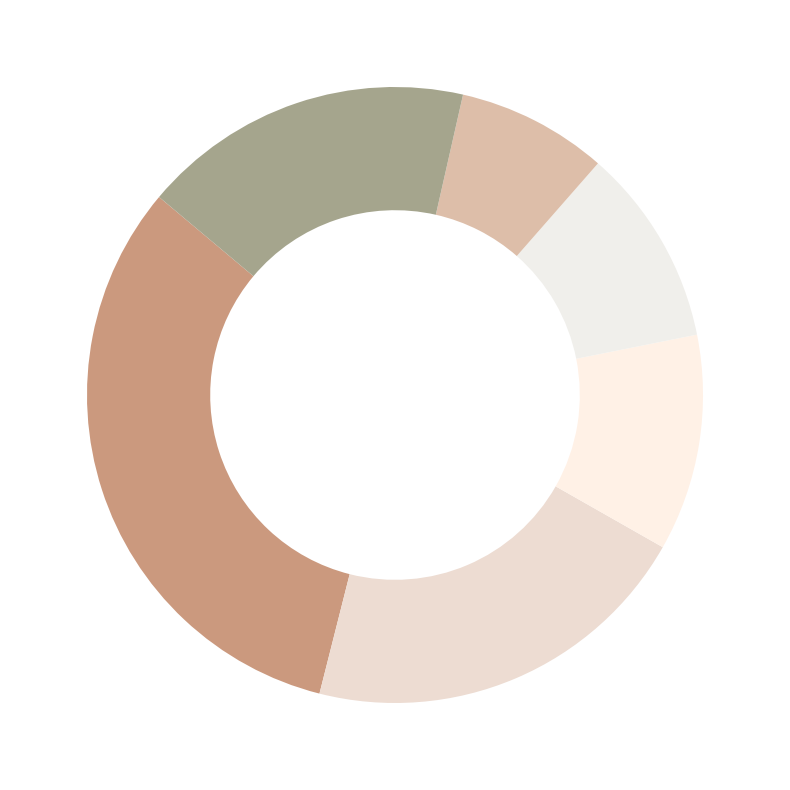

In [25]:
colors = ['#cb997e', '#eddcd2', '#fff1e6', '#f0efeb', '#ddbea9', '#a5a58d']
word_counts = amazon['Product_name'].value_counts()

top5_companies = word_counts.nlargest(5)
other_count = word_counts.iloc[5:].sum()

word_counts_combined = top5_companies.copy()
word_counts_combined['Others'] = other_count

plt.figure(figsize=(10, 10))

wedges = plt.pie(
    word_counts_combined,
    labels=None,
    autopct=None, 
    startangle=140,
    colors=colors[:len(word_counts_combined)],
    wedgeprops={'width': 0.4},
)

plt.gca().set_facecolor('#606060')

plt.show()





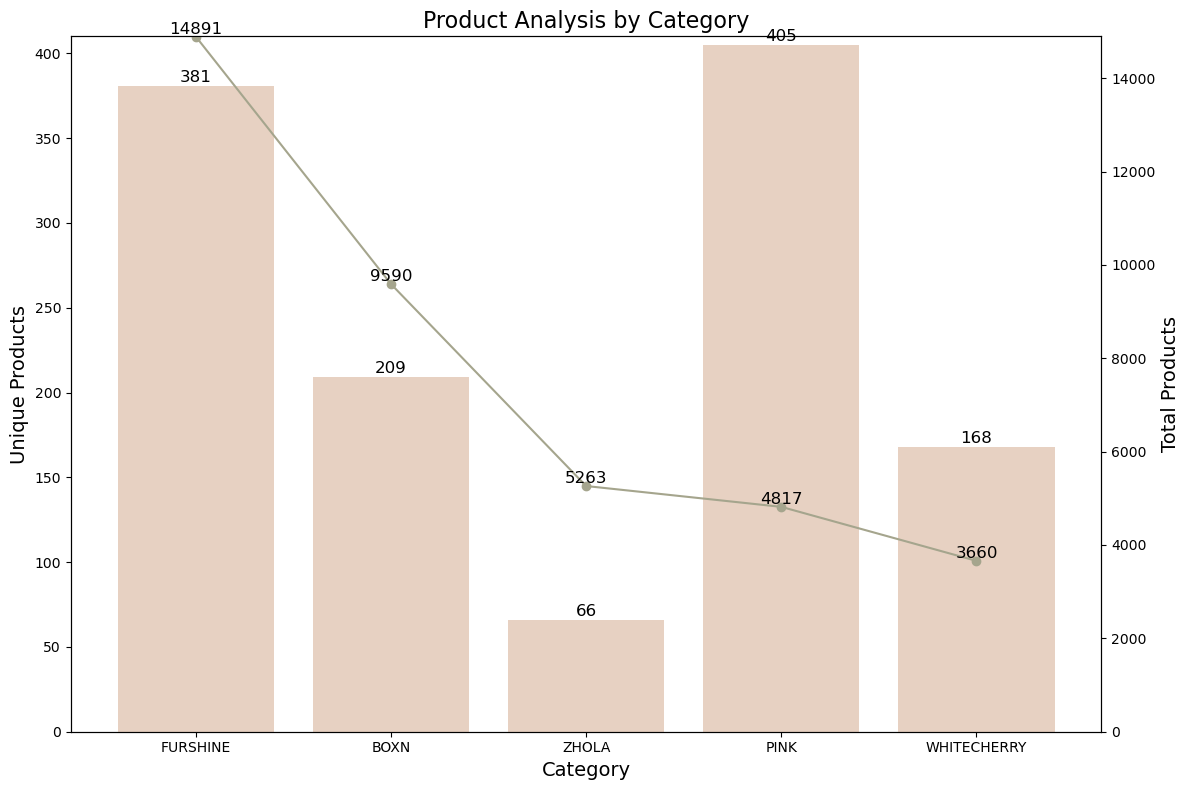

In [26]:
categories = ["FURSHINE", "BOXN", "ZHOLA", "PINK", "WHITECHERRY"]
table_data = []

for category in categories:
    unique_count = amazon[amazon['Product_name'] == category]['product_name'].nunique()
    total_count = amazon[amazon['Product_name'] == category].shape[0]
    table_data.append([category, unique_count, total_count])

table_df = pd.DataFrame(table_data, columns=['Category', 'Unique Products', 'Total Products'])

unique_products_color = '#ddbea9'  
total_products_color = '#a5a58d'   

fig, ax1 = plt.subplots(figsize=(12, 8))

bars = ax1.bar(table_df['Category'], table_df['Unique Products'], color=unique_products_color, alpha=0.7, label='Unique Products')

ax1.set_xlabel('Category', fontsize=14)
ax1.set_ylabel('Unique Products', fontsize=14)
ax1.set_title('Product Analysis by Category', fontsize=16)

ax1.set_ylim(0, table_df['Unique Products'].max() + 5)

# Add numbering on top of the unique products bars
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=12)

ax2 = ax1.twinx() 
line = ax2.plot(table_df['Category'], table_df['Total Products'], color=total_products_color, marker='o', linestyle='-', label='Total Products')

ax2.set_ylabel('Total Products', fontsize=14)
ax2.set_ylim(0, table_df['Total Products'].max() + 5)

# Add numbering on top of the total products line
for x, y in zip(range(len(table_df['Category'])), table_df['Total Products']):
    ax2.text(x, y + 0.5, int(y), ha='center', va='bottom', fontsize=12)

fig.tight_layout()
plt.show()



### 2nd page

In [27]:
amazon['purchase_date'] = pd.to_datetime(amazon['purchase_date'], errors='coerce')

def plot_line_graph_for_year(df, year, category):
    df_year = df[df['purchase_date'].dt.year == year]
    df_category_year = df_year[df_year['Product_name'] == category]
    monthly_counts = df_category_year.groupby(df_category_year['purchase_date'].dt.to_period('M')).size()
    
    plt.figure(figsize=(12, 8))
    plt.plot(monthly_counts.index.to_timestamp(), monthly_counts.values, 
             marker='o', color='#cb997e', linewidth=2.5, label=category)
    
    # Set custom x-tick labels for months
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    plt.xticks(ticks=monthly_counts.index.to_timestamp(), labels=months[:len(monthly_counts)], rotation=45, fontsize = 30)
    
    for x, count in zip(monthly_counts.index.to_timestamp(), monthly_counts.values):
        plt.text(x, count, str(count), ha='center', va='bottom', fontsize=20, fontweight='bold', color='black')
    
    # Turn off y-axis ticks
    plt.yticks(visible=False)
    
    plt.grid(False)
    
    plt.legend()
    plt.tight_layout()
    
    plt.show()
    print(monthly_counts)





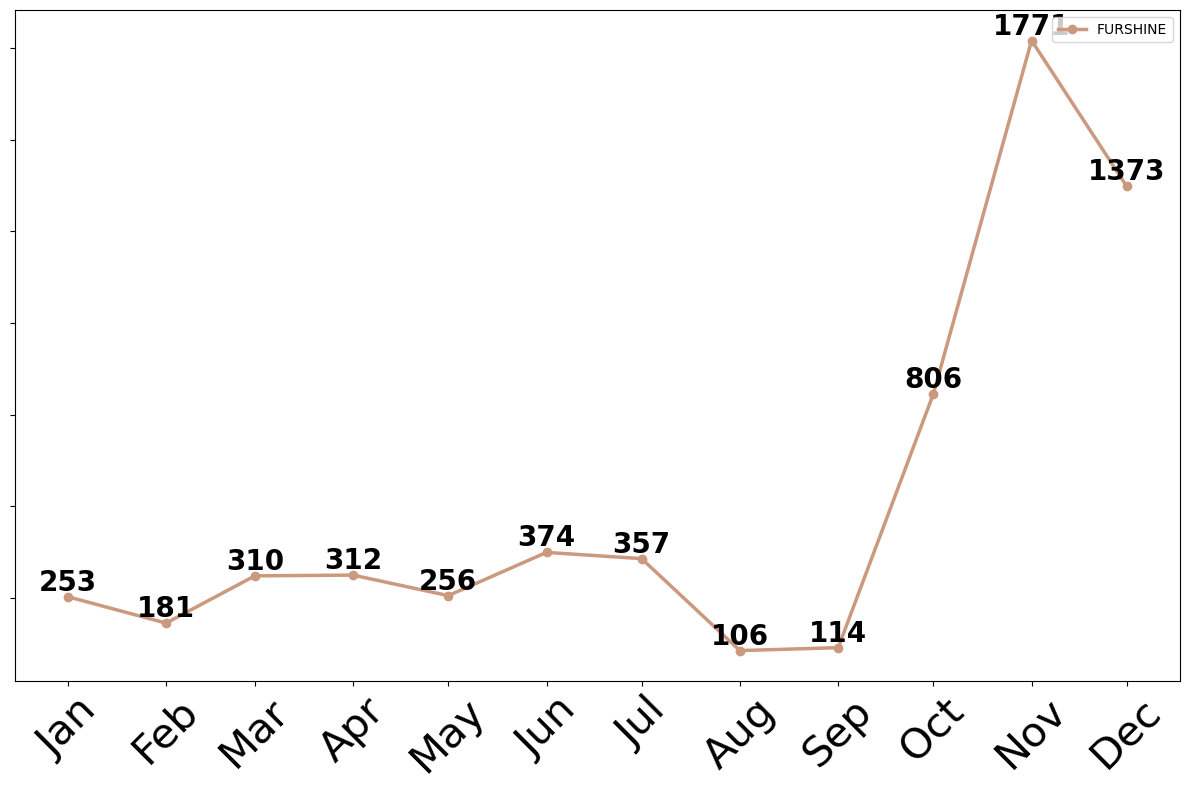

purchase_date
2023-01     253
2023-02     181
2023-03     310
2023-04     312
2023-05     256
2023-06     374
2023-07     357
2023-08     106
2023-09     114
2023-10     806
2023-11    1771
2023-12    1373
Freq: M, dtype: int64


In [28]:
plot_line_graph_for_year(amazon, 2023, 'FURSHINE')

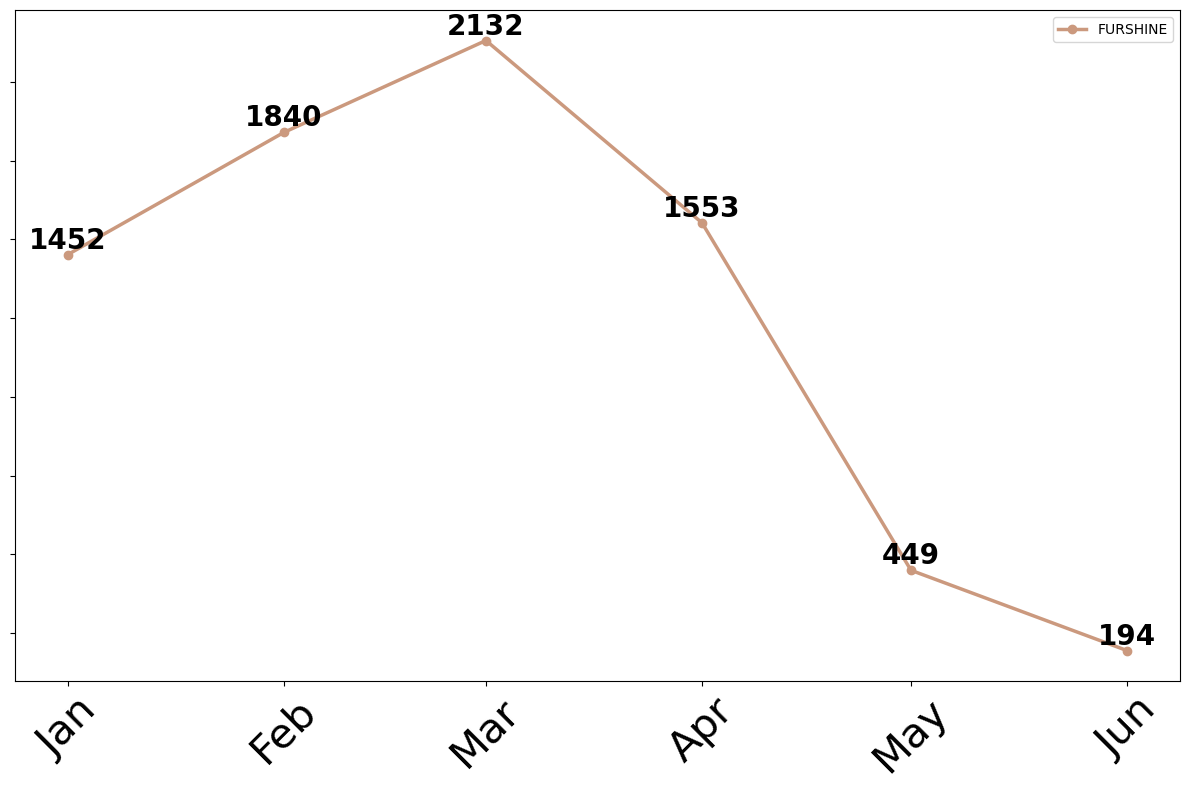

purchase_date
2024-01    1452
2024-02    1840
2024-03    2132
2024-04    1553
2024-05     449
2024-06     194
Freq: M, dtype: int64


In [29]:
plot_line_graph_for_year(amazon, 2024, 'FURSHINE')

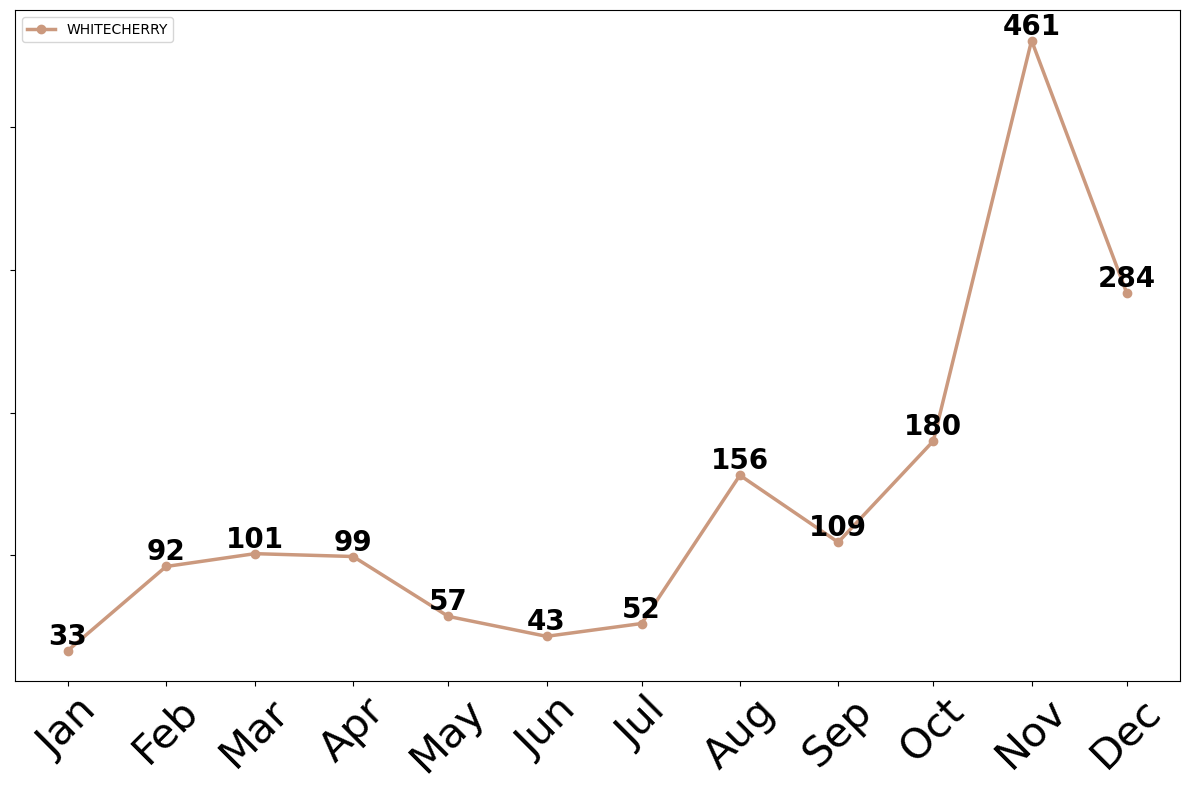

purchase_date
2023-01     33
2023-02     92
2023-03    101
2023-04     99
2023-05     57
2023-06     43
2023-07     52
2023-08    156
2023-09    109
2023-10    180
2023-11    461
2023-12    284
Freq: M, dtype: int64


In [30]:
plot_line_graph_for_year(amazon, 2023, 'WHITECHERRY')

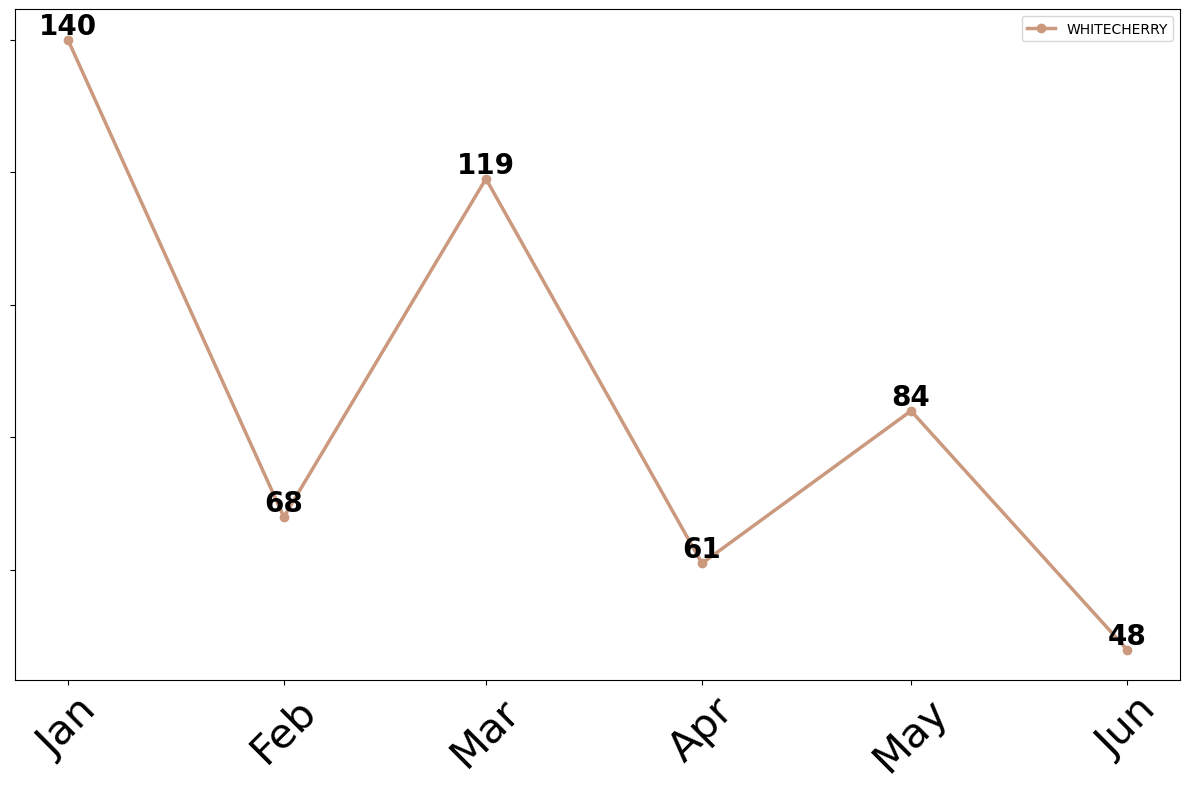

purchase_date
2024-01    140
2024-02     68
2024-03    119
2024-04     61
2024-05     84
2024-06     48
Freq: M, dtype: int64


In [31]:
plot_line_graph_for_year(amazon, 2024, 'WHITECHERRY')

### 3rd slide

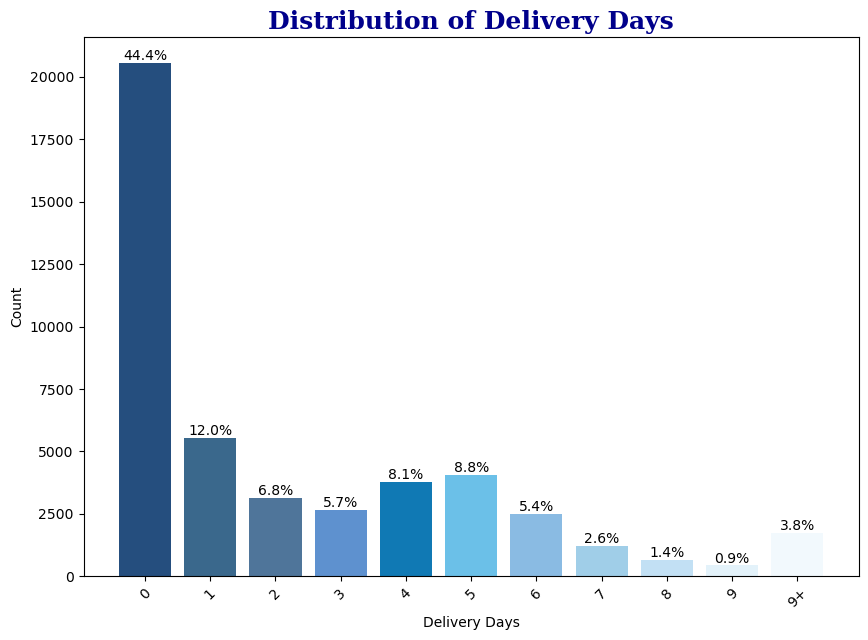

In [32]:
import matplotlib.pyplot as plt
bins = [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, float('inf')]
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '9+']
amazon['delivery_days_bin'] = pd.cut(amazon['delivery_days'], bins=bins, labels=labels)
counts = amazon['delivery_days_bin'].value_counts().reindex(labels)
percentages = counts / counts.sum() * 100
gradient_colors = ['#254e7e', '#3a688c', '#4f759a', '#5e91cf',  # Darker Blue Gradient
    '#1079b4', '#6bc0e8', '#8abbe3', '#a0cee8',  # Mid-range Blue Gradient
    '#c2e0f4', '#e3f2fa', '#f2f9fd']              # Lighter Blue Gradient]
plt.figure(figsize=(10, 7))
plt.bar(counts.index, counts, color=gradient_colors)
for i, count in enumerate(counts):
    plt.text(i, count + 0.5, f'{percentages[i]:.1f}%', ha='center', va='bottom', fontsize=10)
plt.xlabel('Delivery Days')
plt.ylabel('Count')
plt.title('Distribution of Delivery Days', fontdict={
    'fontsize': 18,         # Font size of the title
    'fontweight': 'bold',   # Font weight of the title
    'color': 'darkblue',    # Font color of the title
    'family': 'serif'       # Font family of the title
})
plt.xticks(rotation=45)
plt.show()

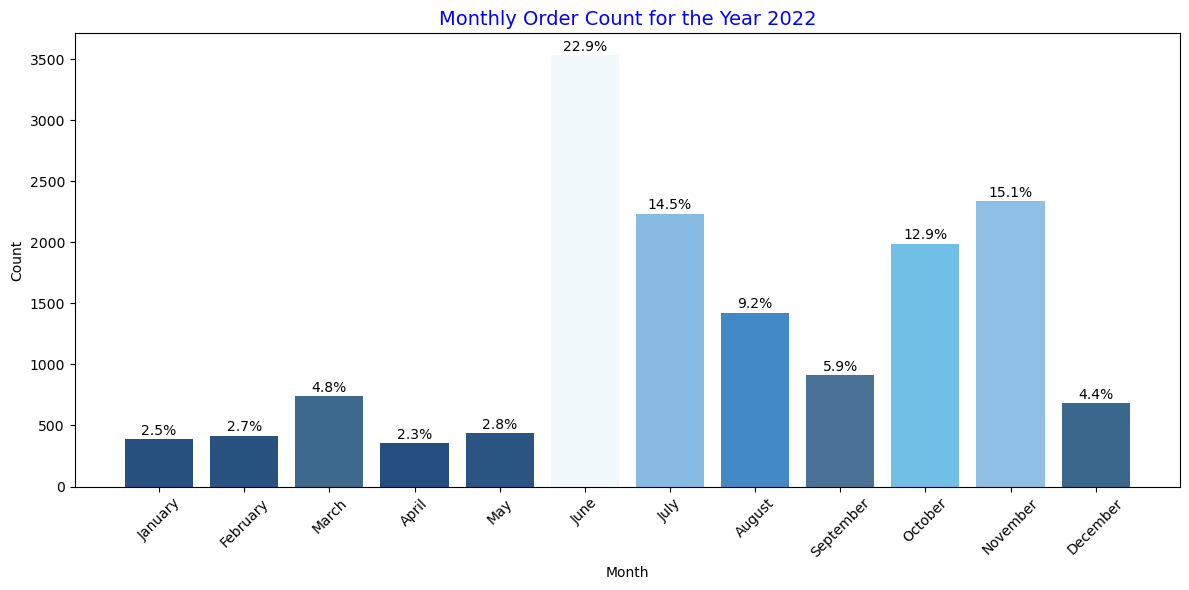

In [33]:
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

amazon['purchase_date'] = pd.to_datetime(amazon['purchase_date'])
amazon['year'] = amazon['purchase_date'].dt.year
amazon['month'] = amazon['purchase_date'].dt.month_name()

data_2022 = amazon[amazon['year'] == 2022]
count_by_month_2022 = data_2022.groupby('month').size().reset_index(name='count')
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]
count_by_month_2022['month'] = pd.Categorical(count_by_month_2022['month'], categories=month_order, ordered=True)
count_by_month_2022 = count_by_month_2022.sort_values('month')

total_count = count_by_month_2022['count'].sum()
count_by_month_2022['percentage'] = (count_by_month_2022['count'] / total_count) * 100

cmap = LinearSegmentedColormap.from_list('blue_gradient',['#254e7e', '#3a688c', '#4f759a', '#5e91cf',  # Darker Blue Gradient
    '#1079b4', '#6bc0e8', '#8abbe3', '#a0cee8',  # Mid-range Blue Gradient
    '#c2e0f4', '#e3f2fa', '#f2f9fd'] )             # Lighter Blue Gradient])
norm = plt.Normalize(count_by_month_2022['count'].min(), count_by_month_2022['count'].max())

plt.figure(figsize=(12, 6))
bars = plt.bar(count_by_month_2022['month'], count_by_month_2022['count'], color=[cmap(norm(val)) for val in count_by_month_2022['count']])
for bar, percentage in zip(bars, count_by_month_2022['percentage']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, 
             f'{percentage:.1f}%', ha='center', va='bottom', fontsize=10)

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Order Count for the Year 2022', fontsize=14, color='blue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [34]:
amazon['product_name'] = amazon['product_name'].str.upper()
amazon['company_name'] = amazon['product_name'].apply(lambda x: ' '.join(x.split()[:1]))
print(amazon[['product_name', 'company_name']].head())

                                        product_name company_name
0  FURSHINE BLUE DROP SOFA COVER ONE 3 SEATER AND...     FURSHINE
1  ZHOLA MEN'S PREMIUM PU-LEATHER FORMAL BELT (CO...        ZHOLA
2  ZHOLA MEN'S PREMIUM PU-LEATHER FORMAL BELT (CO...        ZHOLA
3  FURSHINE BLUE DIAMOND SOFA COVER ONE 3 SEATER ...     FURSHINE
4  BOXN MOSQUITO ECO FRIENDLY ELECTRONIC LED MOSQ...         BOXN


In [35]:
amazon['company_name'] = amazon['company_name'].replace('WHITE', 'WHITECHERRY')

In [36]:
amazon['company_name'].value_counts()

company_name
FURSHINE       14891
BOXN            9590
ZHOLA           5263
PINK            4817
WHITECHERRY     3660
               ...  
4                  1
MATT               1
PR1MER             1
HEMOVIA            1
MULTI              1
Name: count, Length: 74, dtype: int64

In [37]:
amazon['company_name'] = amazon['company_name'].str.replace(r'\bB\b', 'B BESTILO', regex=True)

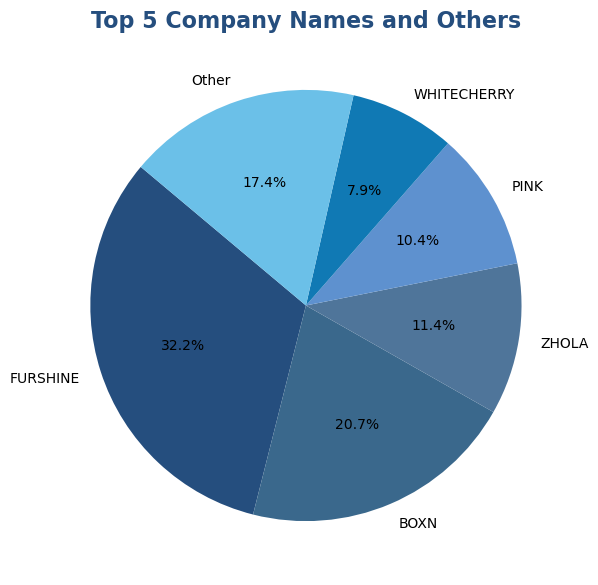

In [38]:
company_counts = amazon['company_name'].value_counts()
top5_companies = company_counts.nlargest(5)
other_count = company_counts.iloc[5:].sum()
labels = list(top5_companies.index) + ['Other']
sizes = list(top5_companies.values) + [other_count]
gradient_colors = ['#254e7e', '#3a688c', '#4f759a', '#5e91cf', '#1079b4', '#6bc0e8']
plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, colors=gradient_colors, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Company Names and Others', fontsize=16, color='#254e7e', fontweight='bold')

plt.show()



In [39]:
# import pandas as pd
# from IPython.display import display, HTML


# categories = ["WHITECHERRY", "PINK", "ZHOLA", "BOXN", "FURSHINE"]
# table_data = []

# # Calculate unique and total product counts for each category
# for category in categories:
#     unique_count = amazon[amazon['company_name'] == category]['product_name'].nunique()
#     total_count = amazon[amazon['company_name'] == category].shape[0]
#     table_data.append([category, unique_count, total_count])

# # Create a DataFrame for the table
# table_df = pd.DataFrame(table_data, columns=['Category', 'Unique Products', 'Total Products'])

# # Convert the DataFrame to HTML
# html_table = table_df.to_html(index=False, escape=False)

# # Style the HTML table
# styled_table = f'''
#     <style>
#         table {{border-collapse: collapse; width: 50%; margin: 20px auto; font-family: Arial, sans-serif; color: #ffffff;}}
#         th, td {{border: 1px solid #dddddd; text-align: left; padding: 8px;}}
#         tr:nth-child(even) {{background-color: #156b97;}}
#         tr:nth-child(odd) {{background-color: #1079b4;}}
#         th {{background-color: #254e7e; color: white;}}
#     </style>
#     {html_table}
# '''

# # Display the styled table
# display(HTML(styled_table))

In [40]:
# import pandas as pd
# from IPython.display import display, HTML, clear_output
# amazon['order_date'] = pd.to_datetime(amazon['purchase_date'], errors='coerce')
# companies = ["FURSHINE", "BOXN", "ZHOLA", "PINK", "WHITECHERRY"]
# first_order_dates = []

# for company in companies:
#     company_orders = amazon[amazon['company_name'] == company]

#     first_order_date = company_orders['order_date'].min()
    
#     first_order_dates.append([company, first_order_date])

# first_order_df = pd.DataFrame(first_order_dates, columns=['Company', 'First Order Date'])

# first_order_df['First Order Date'] = first_order_df['First Order Date'].fillna('No Data')

# # Define the HTML style for the table with the new colors
# html_table = first_order_df.to_html(index=False, escape=False, formatters={'First Order Date': lambda x: x if x == 'No Data' else pd.to_datetime(x).strftime('%Y-%m-%d')})
# styled_table = f'''
#     <style>
#         table {{border-collapse: collapse; width: 50%; margin: 20px auto; font-family: Arial, sans-serif; color: #333;}}
#         th, td {{border: 1px solid #ccc; text-align: left; padding: 8px;}}
#         tr:nth-child(even) {{background-color: #eddcd2;}}
#         tr:nth-child(odd) {{background-color: #fff1e6;}}
#         th {{background-color: #cb997e; color: white;}}
#         td {{background-color: #f0efeb;}}
#         tr:hover {{background-color: #ddbea9;}}
#     </style>
#     {html_table}
# '''

# # Display the styled table
# display(HTML(styled_table))

# # Clear output
# clear_output(wait=True)


In [41]:
fil = amazon[amazon['company_name'] == 'PINK']
fil['product_name'].value_counts()

product_name
PINK LINE SUPER LARGE MINERAL POWDER BRUSH NAIL BRUSHES KABUKI MAKEUP BRUSHES SOFT FLUFFY FOUNDATION BRUSH BLUSH BRUSH PROFESSIONAL POWDER BRUSH FOR DAILY MAKEUP (PACK OF 1)    814
PINK LINE SOFT ROUND LOOSE POWDER PUFF PAD WASHABLE VELOUR SMOOTH BATH BODY POWDER PUFF/FOR FACE NECK MAKEUP/BODY POWDER PUFF DUSTING POWDER BLENDING                            248
PINK LINE WHITECHERRY EYE LINER, VELVET FINISH                                                                                                                                   219
PINK LINE SMUDGE PROOF AND WATERPROOF EYE LINER AND LIP LINER (SET OF 12)|( LIP LINER PENCIL SET , LIP LINER FOR WOMEN)                                                          218
PINK LINE MATTE LIPGLOSS LIPSTICK 24 GM, ROYAL RED                                                                                                                               199
                                                                                  

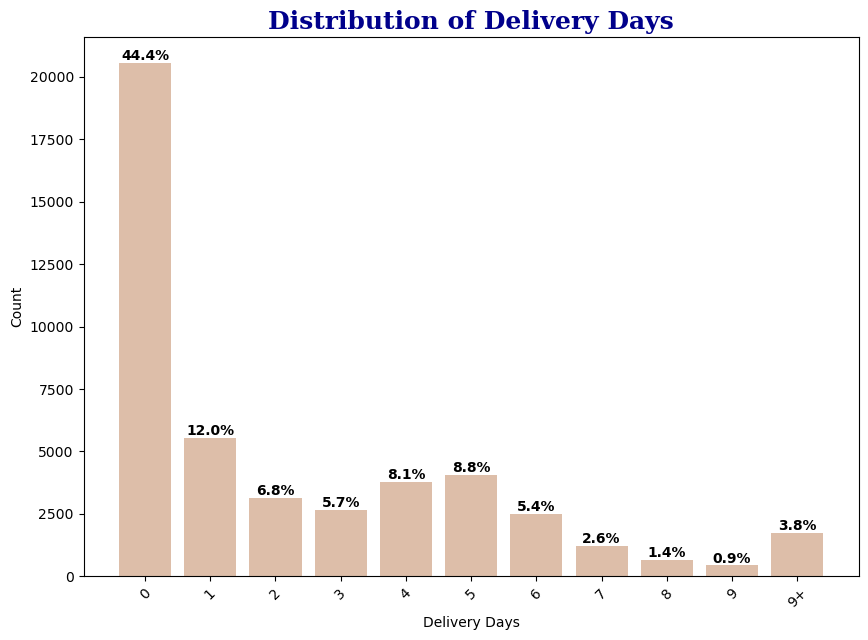

In [42]:
bins = [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, float('inf')]
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '9+']
amazon['delivery_days_bin'] = pd.cut(amazon['delivery_days'], bins=bins, labels=labels)

# Calculate counts and percentages
counts = amazon['delivery_days_bin'].value_counts().reindex(labels)
percentages = counts / counts.sum() * 100

# Plot
plt.figure(figsize=(10, 7))
plt.bar(counts.index, counts, color='#ddbea9')  # Updated color to #ddbea9
for i, count in enumerate(counts):
    plt.text(i, count + 0.5, f'{percentages[i]:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')  # Bolded the text

# Customize plot appearance
plt.xlabel('Delivery Days')
plt.ylabel('Count')
plt.title('Distribution of Delivery Days', fontdict={
    'fontsize': 18,
    'fontweight': 'bold',
    'color': 'darkblue',
    'family': 'serif'
})
plt.xticks(rotation=45)
plt.show()



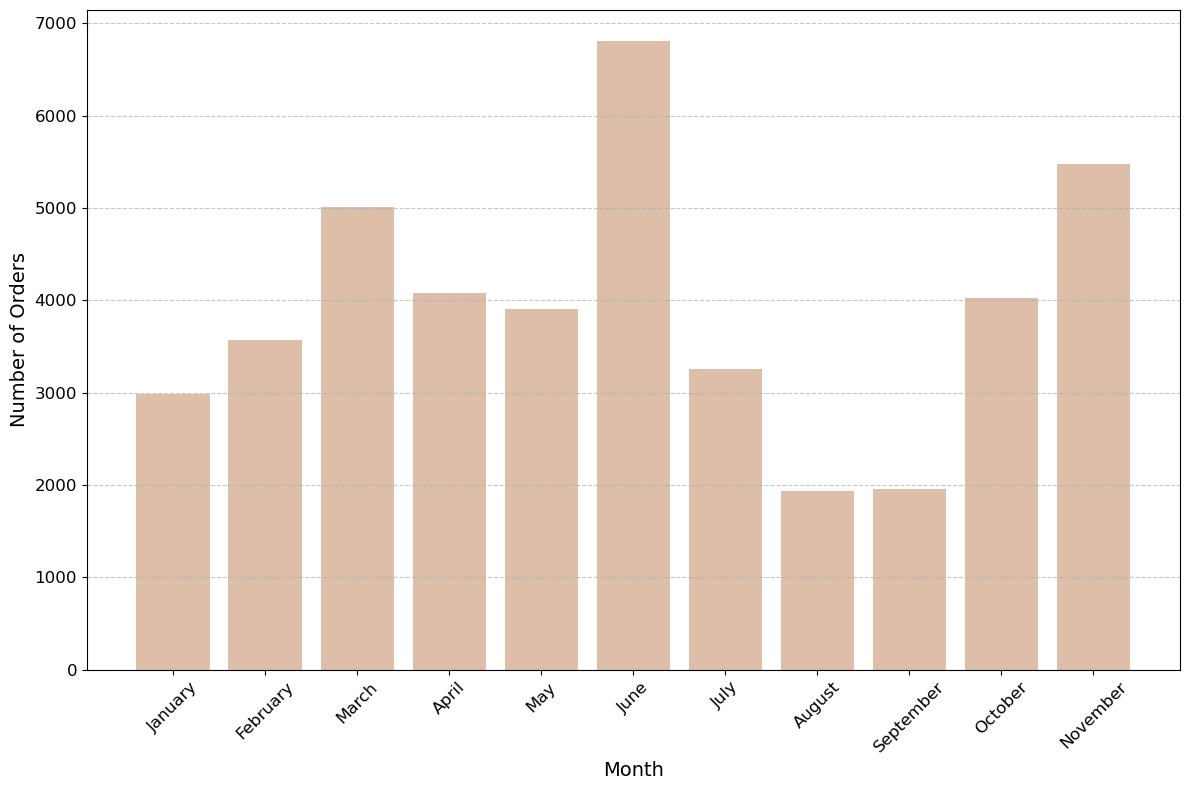

In [43]:
amazon['purchase_date'] = pd.to_datetime(amazon['purchase_date'], errors='coerce')

# Extract month (ignore year) from 'purchase_date'
amazon['month'] = amazon['purchase_date'].dt.month_name()

# Count orders per month
monthly_order_counts = amazon['month'].value_counts()
monthly_order_counts = monthly_order_counts.reindex(pd.date_range('2024-01', '2024-12', freq='M').month_name())

# Plotting the number of orders per month
plt.figure(figsize=(12, 8))
plt.bar(monthly_order_counts.index, monthly_order_counts.values, color='#ddbea9')


plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [44]:
amazon['ship_state'].value_counts()

ship_state
UTTAR PRADESH        5857
MAHARASHTRA          4499
KARNATAKA            3706
TELANGANA            3531
TAMIL NADU           3450
                     ... 
Orissa                  1
Easy Ship               1
ANDHRAPRADESH           1
Chattisgarh             1
Jammu and kashmir       1
Name: count, Length: 206, dtype: int64

In [45]:
amazon['ship_state'] = amazon['ship_state'].str.upper()
state_mapping = {
    'ANDHRA PRADESH': 'ANDHRA PRADESH',
    'ANDHRAPRADESH': 'ANDHRA PRADESH',
    'MAHARASHTRA': 'MAHARASHTRA',
    'TAMILNADU': 'TAMIL NADU',
    'TAMIL NADU': 'TAMIL NADU',
    'J&K': 'JAMMU AND KASHMIR',
    'JK': 'JAMMU AND KASHMIR',
    'JAMMU AND KASHMIR': 'JAMMU AND KASHMIR',
    # Add more mappings as needed
}

# Apply the mapping to standardize 'ship_state'
amazon['ship_state'] = amazon['ship_state'].replace(state_mapping)
unique_states = amazon['ship_state'].unique()
print("Unique states after standardization:", unique_states)

Unique states after standardization: ['GOA' 'MANIPUR' 'KARNATAKA' 'PUNJAB' 'UTTAR PRADESH' 'MAHARASHTRA'
 'TELANGANA' 'MADHYA PRADESH' 'WEST BENGAL' 'DELHI' 'RAJASTHAN' 'HARYANA'
 'ANDHRA PRADESH' 'ODISHA' 'KERALA' 'BIHAR' 'ASSAM' 'JHARKHAND'
 '2024-02-08 11:32:01' 'TAMIL NADU' 'UTTARAKHAND' 'CHANDIGARH' 'GUJARAT'
 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'MEGHALAYA' 'CHHATTISGARH' 'SIKKIM'
 'PUDUCHERRY' nan 'MIZORAM' 'CHATTISGARH' 'JAMMU KASHMIR' 'LADAKH'
 'MHARASHTRA' 'JAMMU AND KASHMIR' 'KL'
 'DADRA AND NAGAR HAVELI AND DAMAN AND DIU' 'UP'
 'ANDAMAN & NICOBAR ISLANDS' '2024-02-08 11:31:39' 'ARUNACHAL PRADESH'
 'NAGALAND' 'NEW DELHI' 'UTTARPRADESH' '2024-02-08 11:31:32' 'UP.' 'DL'
 'AP' 'MH' 'TRIPURA' 'KARANATAKA' 'UTTARPARDESH' 'U.P.' 'UTTRANCHAL' 'WB'
 'MADHYAPRADESH' 'GJ' 'TG' 'TELANGANA 0' 'U P' 'TN'
 'ANDAMAN AND NICOBAR ISLAND' 'LAKSHADWEEP' '2024-02-08 11:32:00' 'APO'
 'MP' 'MAHARASTRA' 'CHHATTISHGARH' '2024-02-08 11:31:27' 'ODISA'
 '2024-02-08 11:31:55' '2024-02-08 11:31:48' 'OR'

In [46]:
import pandas as pd

# Sample DataFrame setup (replace this with your actual DataFrame)
# amazon = pd.read_csv('your_amazon_dataset.csv')

# Convert 'ship_state' to string (if it's not already)
amazon['ship_state'] = amazon['ship_state'].astype(str)

# List of unwanted values to be removed
unwanted_values = [
    'nan', '2024-02-08 11:32:01', '2024-02-08 11:31:39', '2024-02-08 11:31:32', 
    '2024-02-08 11:32:00', '2024-02-08 11:31:27', '2024-02-08 11:31:55', 
    '2024-02-08 11:31:48', '2024-02-08 11:32:13', 'EASY SHIP', '2024-02-08 11:31:24', 
    '2024-02-08 11:31:21', '2024-02-08 11:31:09', '2024-02-08 11:31:51', 
    'CONTACT NO.- 9431750952', '8292388391)', '2024-02-08 11:31:49', 
    '2024-02-08 11:31:50', '2024-02-08 11:32:02', '2024-02-08 11:31:22', 
    '2024-02-08 11:31:58', '2024-02-08 11:31:57', '2024-02-08 11:31:56','2024-02-08 11:31:02','2024-02-08 11:32:18'
    ,'2024-02-08 11:31:03'
]

# Filter out unwanted values
amazon = amazon[~amazon['ship_state'].isin(unwanted_values)]

# Check unique values in 'ship_state' after cleaning
unique_states = amazon['ship_state'].unique()
print("Unique states after cleaning:", unique_states)


Unique states after cleaning: ['GOA' 'MANIPUR' 'KARNATAKA' 'PUNJAB' 'UTTAR PRADESH' 'MAHARASHTRA'
 'TELANGANA' 'MADHYA PRADESH' 'WEST BENGAL' 'DELHI' 'RAJASTHAN' 'HARYANA'
 'ANDHRA PRADESH' 'ODISHA' 'KERALA' 'BIHAR' 'ASSAM' 'JHARKHAND'
 'TAMIL NADU' 'UTTARAKHAND' 'CHANDIGARH' 'GUJARAT' 'HIMACHAL PRADESH'
 'JAMMU & KASHMIR' 'MEGHALAYA' 'CHHATTISGARH' 'SIKKIM' 'PUDUCHERRY'
 'MIZORAM' 'CHATTISGARH' 'JAMMU KASHMIR' 'LADAKH' 'MHARASHTRA'
 'JAMMU AND KASHMIR' 'KL' 'DADRA AND NAGAR HAVELI AND DAMAN AND DIU' 'UP'
 'ANDAMAN & NICOBAR ISLANDS' 'ARUNACHAL PRADESH' 'NAGALAND' 'NEW DELHI'
 'UTTARPRADESH' 'UP.' 'DL' 'AP' 'MH' 'TRIPURA' 'KARANATAKA' 'UTTARPARDESH'
 'U.P.' 'UTTRANCHAL' 'WB' 'MADHYAPRADESH' 'GJ' 'TG' 'TELANGANA 0' 'U P'
 'TN' 'ANDAMAN AND NICOBAR ISLAND' 'LAKSHADWEEP' 'APO' 'MP' 'MAHARASTRA'
 'CHHATTISHGARH' 'ODISA' 'OR' 'PONDICHERRY' 'WESTBENGAL' 'UTTRAKHAND'
 'DADRA & NAGAR HAVELI' 'ORISSA' 'UTTER PRADESH' 'DAMAN & DIU'
 'CHANDIGHAR' 'HR' 'CT' 'KA' 'CH' 'TELANGAANA' 'KARATAKA' 'SOUTH

In [47]:
state_mapping = {
    'ANDHRA PRADESH': 'ANDHRA PRADESH', 'ANDHRAPRADESH': 'ANDHRA PRADESH', 'AP': 'ANDHRA PRADESH',
    'ANDAMAN & NICOBAR ISLANDS': 'ANDAMAN & NICOBAR ISLANDS', 'ANDAMAN AND NICOBAR ISLAND': 'ANDAMAN & NICOBAR ISLANDS',
    'ARUNACHAL PRADESH': 'ARUNACHAL PRADESH', 'ASSAM': 'ASSAM',
    'BIHAR': 'BIHAR', 'CHANDIGARH': 'CHANDIGARH', 'CHANDIGHAR': 'CHANDIGARH',
    'CHHATTISGARH': 'CHHATTISGARH', 'CHATTISGARH': 'CHHATTISGARH', 'CHHATTISHGARH': 'CHHATTISGARH',
    'DAMAN & DIU': 'DAMAN & DIU', 'DADRA AND NAGAR HAVELI AND DAMAN AND DIU': 'DADRA AND NAGAR HAVELI AND DAMAN AND DIU',
    'DADRA & NAGAR HAVELI': 'DADRA AND NAGAR HAVELI', 'DELHI': 'DELHI', 'NEW DELHI': 'DELHI',
    'GOA': 'GOA', 'GUJARAT': 'GUJARAT', 'HARYANA': 'HARYANA', 'HIMACHAL PRADESH': 'HIMACHAL PRADESH', 'HIMACHAL PARDESH': 'HIMACHAL PRADESH',
    'JAMMU & KASHMIR': 'JAMMU & KASHMIR', 'JAMMU KASHMIR': 'JAMMU & KASHMIR', 'JAMMU AND KASHMIR': 'JAMMU & KASHMIR',
    'JHARKHAND': 'JHARKHAND', 'JHARKAND': 'JHARKHAND', 'JHARKHAND..(CONTACT NO.- 9431750952, 8292388391)': 'JHARKHAND',
    'KARNATAKA': 'KARNATAKA', 'KARANATAKA': 'KARNATAKA', 'KA': 'KARNATAKA', 'KARATAKA': 'KARNATAKA',
    'KERALA': 'KERALA', 'LAKSHADWEEP': 'LAKSHADWEEP',
    'MADHYA PRADESH': 'MADHYA PRADESH', 'MADHYAPRADESH': 'MADHYA PRADESH', 'MP': 'MADHYA PRADESH',
    'MAHARASHTRA': 'MAHARASHTRA', 'MHARASHTRA': 'MAHARASHTRA', 'MAHARASTRA': 'MAHARASHTRA',
    'MEGHALAYA': 'MEGHALAYA', 'MIZORAM': 'MIZORAM',
    'NAGALAND': 'NAGALAND', 'ODISHA': 'ODISHA', 'ODISA': 'ODISHA', 'ORISSA': 'ODISHA', 'OR': 'ODISHA',
    'PUDUCHERRY': 'PUDUCHERRY', 'PONDICHERRY': 'PUDUCHERRY',
    'PUNJAB': 'PUNJAB', 'RAJASTHAN': 'RAJASTHAN', 'RJ': 'RAJASTHAN', 'RAJSATHAN': 'RAJASTHAN',
    'SIKKIM': 'SIKKIM', 'TAMIL NADU': 'TAMIL NADU', 'TN': 'TAMIL NADU', 'TAMILNADU': 'TAMIL NADU',
    'TELANGANA': 'TELANGANA', 'TELANGANA 0': 'TELANGANA', 'TELANAGANA': 'TELANGANA', 'TELANGAANA': 'TELANGANA', 'TELANGANA STATE': 'TELANGANA',
    'TRIPURA': 'TRIPURA', 'UP': 'UTTAR PRADESH', 'U.P.': 'UTTAR PRADESH', 'UTTAR PRADESH': 'UTTAR PRADESH',
    'UTTARPRADESH': 'UTTAR PRADESH', 'UTTRANCHAL': 'UTTARAKHAND', 'UTTRAKHAND': 'UTTARAKHAND',
    'WEST BENGAL': 'WEST BENGAL', 'WB': 'WEST BENGAL', 'WESTBENGAL': 'WEST BENGAL',
    'UT': 'UTTAR PRADESH', 'U P': 'UTTAR PRADESH', 'HR': 'HARYANA', 'CT': 'CHHATTISGARH',
    'BR': 'BIHAR', 'CH': 'CHANDIGARH', 'PB': 'PUNJAB', 'DEHLI DEHLI': 'DELHI', 'SOUTH DELHI': 'DELHI',
    'SOUTH WEST DELHI': 'DELHI', 'M.P': 'MADHYA PRADESH', 'JH': 'JHARKHAND'
}



In [48]:
import pandas as pd
amazon['ship_state'] = amazon['ship_state'].astype(str)
amazon['ship_state'] = amazon['ship_state'].map(state_mapping).fillna(amazon['ship_state'])
unique_states = amazon['ship_state'].unique()
print("Unique states after cleaning:", unique_states)


Unique states after cleaning: ['GOA' 'MANIPUR' 'KARNATAKA' 'PUNJAB' 'UTTAR PRADESH' 'MAHARASHTRA'
 'TELANGANA' 'MADHYA PRADESH' 'WEST BENGAL' 'DELHI' 'RAJASTHAN' 'HARYANA'
 'ANDHRA PRADESH' 'ODISHA' 'KERALA' 'BIHAR' 'ASSAM' 'JHARKHAND'
 'TAMIL NADU' 'UTTARAKHAND' 'CHANDIGARH' 'GUJARAT' 'HIMACHAL PRADESH'
 'JAMMU & KASHMIR' 'MEGHALAYA' 'CHHATTISGARH' 'SIKKIM' 'PUDUCHERRY'
 'MIZORAM' 'LADAKH' 'KL' 'DADRA AND NAGAR HAVELI AND DAMAN AND DIU'
 'ANDAMAN & NICOBAR ISLANDS' 'ARUNACHAL PRADESH' 'NAGALAND' 'UP.' 'DL'
 'MH' 'TRIPURA' 'UTTARPARDESH' 'GJ' 'TG' 'LAKSHADWEEP' 'APO'
 'DADRA AND NAGAR HAVELI' 'UTTER PRADESH' 'DAMAN & DIU' 'UTTER PARDESH'
 'HHATTSGARH' 'UTTAR PARDESH' 'MAGHALAYA' 'NEW DEHLI']


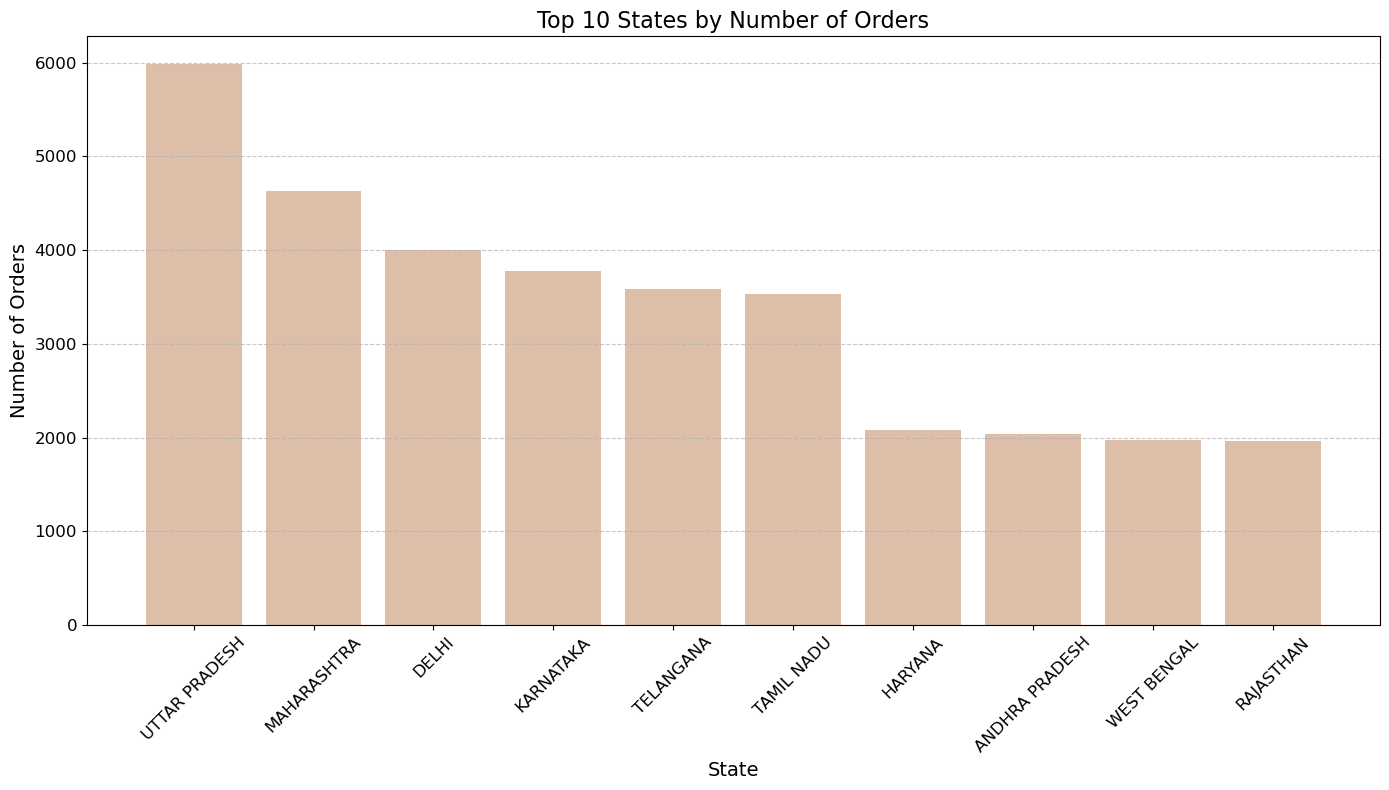

In [49]:
import matplotlib.pyplot as plt

# Count occurrences of each state
state_counts = amazon['ship_state'].value_counts()

# Select the top 10 states
top_10_states = state_counts.head(10)

# Plotting the bar graph
plt.figure(figsize=(14, 8))
plt.bar(top_10_states.index, top_10_states.values, color='#ddbea9')

plt.xlabel('State', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.title('Top 10 States by Number of Orders', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


In [50]:
# Convert columns to numeric, forcing errors to NaN
numeric_columns = [
    'item_price', 'item_tax', 'shipping_price', 'shipping_tax',
    'gift_wrap_price', 'gift_wrap_tax', 'item_promotion_discount',
    'ship_promotion_discount'
]

for column in numeric_columns:
    amazon[column] = pd.to_numeric(amazon[column], errors='coerce')
amazon['total_cost'] = (amazon['item_price'] + amazon['item_tax'] +
                        amazon['shipping_price'] + amazon['shipping_tax'] +
                        amazon['gift_wrap_price'] + amazon['gift_wrap_tax'] -
                        amazon['item_promotion_discount'] - amazon['ship_promotion_discount'])
amazon['total_cost'].fillna(0, inplace=True)


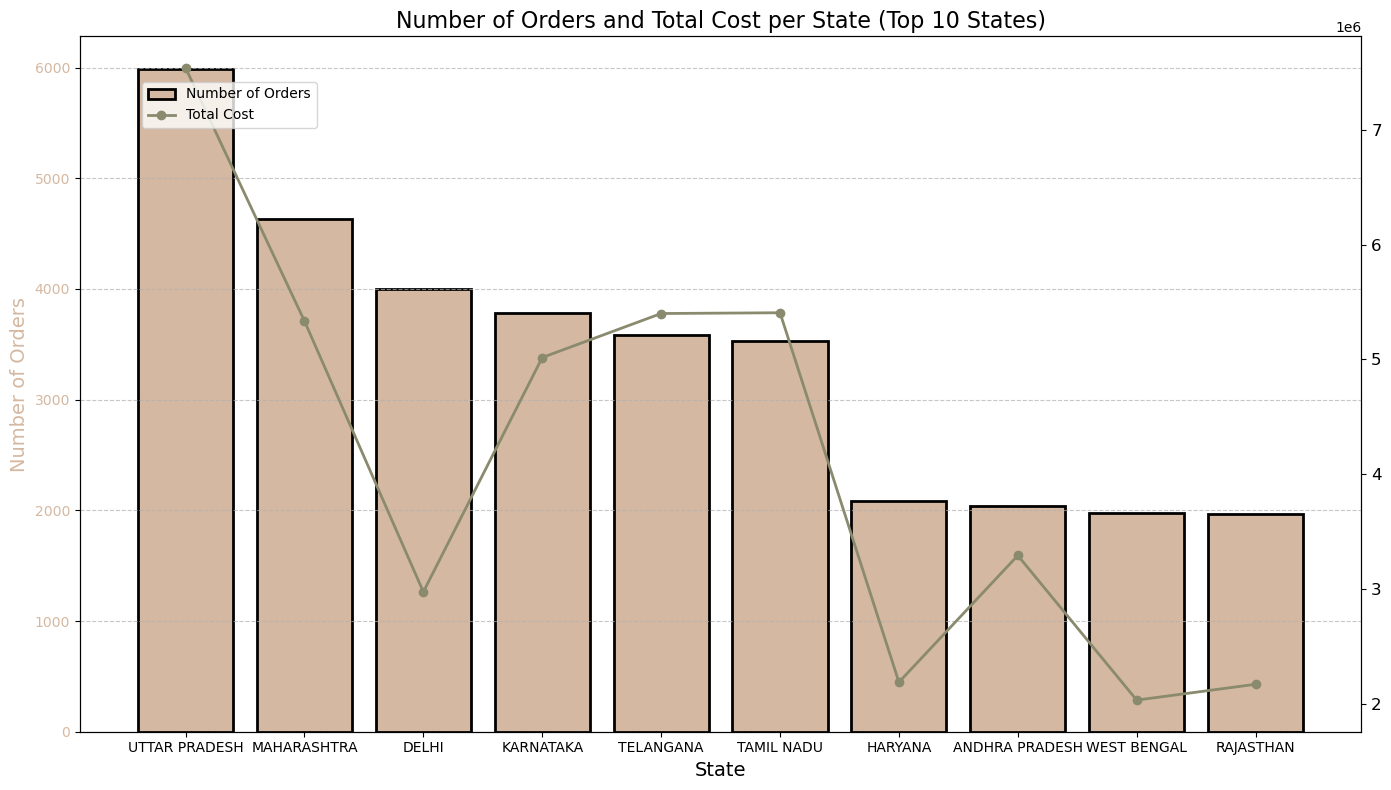

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure columns are numeric
numeric_columns = [
    'item_price', 'item_tax', 'shipping_price', 'shipping_tax',
    'gift_wrap_price', 'gift_wrap_tax', 'item_promotion_discount',
    'ship_promotion_discount'
]

for column in numeric_columns:
    amazon[column] = pd.to_numeric(amazon[column], errors='coerce')

# Calculate total cost for each order
amazon['total_cost'] = (amazon['item_price'] + amazon['item_tax'] +
                        amazon['shipping_price'] + amazon['shipping_tax'] +
                        amazon['gift_wrap_price'] + amazon['gift_wrap_tax'] -
                        amazon['item_promotion_discount'] - amazon['ship_promotion_discount'])
amazon['total_cost'].fillna(0, inplace=True)

top_states = amazon['ship_state'].value_counts().head(10).index
filtered_amazon = amazon[amazon['ship_state'].isin(top_states)]
state_total_cost = filtered_amazon.groupby('ship_state')['total_cost'].sum()
state_counts = filtered_amazon['ship_state'].value_counts()
state_total_cost = state_total_cost[state_counts.index]
fig, ax1 = plt.subplots(figsize=(14, 8))
bar_color = '#d5b8a1' 
bars = ax1.bar(state_counts.index, state_counts.values, color=bar_color, label='Number of Orders', edgecolor='black', linewidth=2)
ax1.set_xlabel('State', fontsize=14)
ax1.set_ylabel('Number of Orders', fontsize=14, color=bar_color)
ax1.tick_params(axis='y', labelcolor=bar_color)

ax2 = ax1.twinx()
line_color = '#8a8a6e'  # Darker line color
line = ax2.plot(state_total_cost.index, state_total_cost.values, color=line_color, marker='o', linewidth=2, label='Total Cost')
# Title and grid
plt.title('Number of Orders and Total Cost per State (Top 10 States)', fontsize=16)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Add legends without total cost labels
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Rotate x-ticks for better readability
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.show()




In [52]:
print(state_total_cost)

ship_state
UTTAR PRADESH     7538618.22
MAHARASHTRA       5334071.94
DELHI             2976310.97
KARNATAKA         5017098.72
TELANGANA         5400221.58
TAMIL NADU        5406823.63
HARYANA           2189862.25
ANDHRA PRADESH    3293215.96
WEST BENGAL       2033669.75
RAJASTHAN         2171609.41
Name: total_cost, dtype: float64


In [53]:
num_states = amazon['ship_city']
print("Number of unique states:", num_states)

Number of unique states: 0        CALANGUTE
1           Wangoi
2        Bengaluru
3         Bhatinda
4            Noida
           ...    
46287        Delhi
46288    New Delhi
46289    New Delhi
46290        Delhi
46291    New Delhi
Name: ship_city, Length: 46101, dtype: object


In [54]:
city_mapping = {
    "BENGALURU": "Bangalore",
    "MUMBAI": "Mumbai",
    "NEW DELHI": "Delhi",
    "HYDERABAD": "Hyderabad",
    # Add more mappings as needed
}


In [55]:
amazon['ship_city'] = amazon['ship_city'].replace(city_mapping)


In [56]:
amazon['ship_city'] = amazon['ship_city'].str.upper()


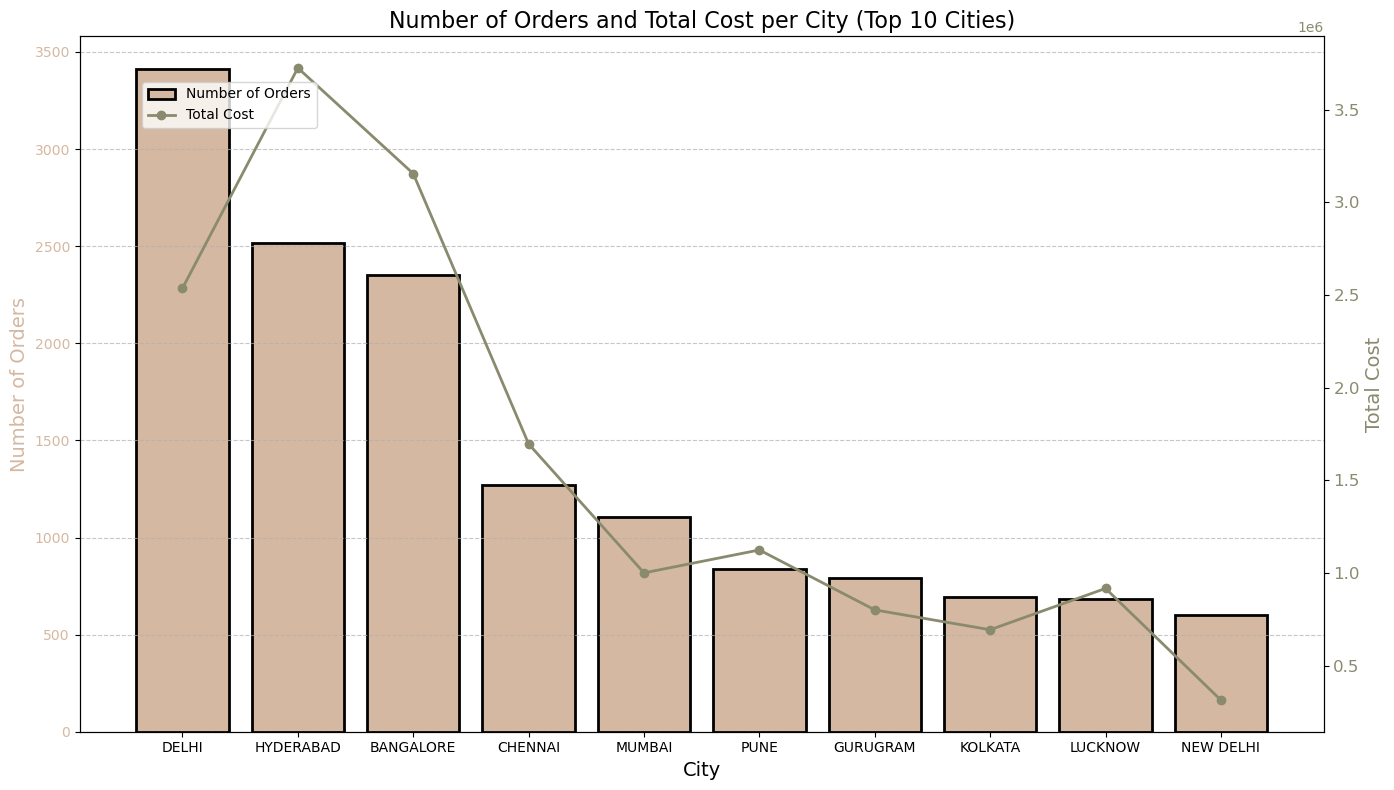

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure columns are numeric
numeric_columns = [
    'item_price', 'item_tax', 'shipping_price', 'shipping_tax',
    'gift_wrap_price', 'gift_wrap_tax', 'item_promotion_discount',
    'ship_promotion_discount'
]

for column in numeric_columns:
    amazon[column] = pd.to_numeric(amazon[column], errors='coerce')

# Calculate total cost for each order
amazon['total_cost'] = (amazon['item_price'] + amazon['item_tax'] +
                        amazon['shipping_price'] + amazon['shipping_tax'] +
                        amazon['gift_wrap_price'] + amazon['gift_wrap_tax'] -
                        amazon['item_promotion_discount'] - amazon['ship_promotion_discount'])
amazon['total_cost'].fillna(0, inplace=True)

# Get top 10 cities by number of orders
top_cities = amazon['ship_city'].value_counts().head(10).index
filtered_amazon = amazon[amazon['ship_city'].isin(top_cities)]

# Group by city
city_total_cost = filtered_amazon.groupby('ship_city')['total_cost'].sum()
city_counts = filtered_amazon['ship_city'].value_counts()

# Ensure the order of city_total_cost matches city_counts
city_total_cost = city_total_cost[city_counts.index]

# Create the plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar plot for number of orders
bar_color = '#d5b8a1' 
bars = ax1.bar(city_counts.index, city_counts.values, color=bar_color, label='Number of Orders', edgecolor='black', linewidth=2)
ax1.set_xlabel('City', fontsize=14)
ax1.set_ylabel('Number of Orders', fontsize=14, color=bar_color)
ax1.tick_params(axis='y', labelcolor=bar_color)

# Line plot for total cost
ax2 = ax1.twinx()
line_color = '#8a8a6e'  # Darker line color
line = ax2.plot(city_total_cost.index, city_total_cost.values, color=line_color, marker='o', linewidth=2, label='Total Cost')
ax2.set_ylabel('Total Cost', fontsize=14, color=line_color)
ax2.tick_params(axis='y', labelcolor=line_color)

# Title and grid
plt.title('Number of Orders and Total Cost per City (Top 10 Cities)', fontsize=16)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Add legends
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Rotate x-ticks for better readability
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.show()


In [58]:
print(city_total_cost)

ship_city
DELHI        2535714.15
HYDERABAD    3724855.71
BANGALORE    3154620.44
CHENNAI      1696021.83
MUMBAI        999998.25
PUNE         1123721.79
GURUGRAM      800320.62
KOLKATA       693283.52
LUCKNOW       916138.52
NEW DELHI     313465.44
Name: total_cost, dtype: float64


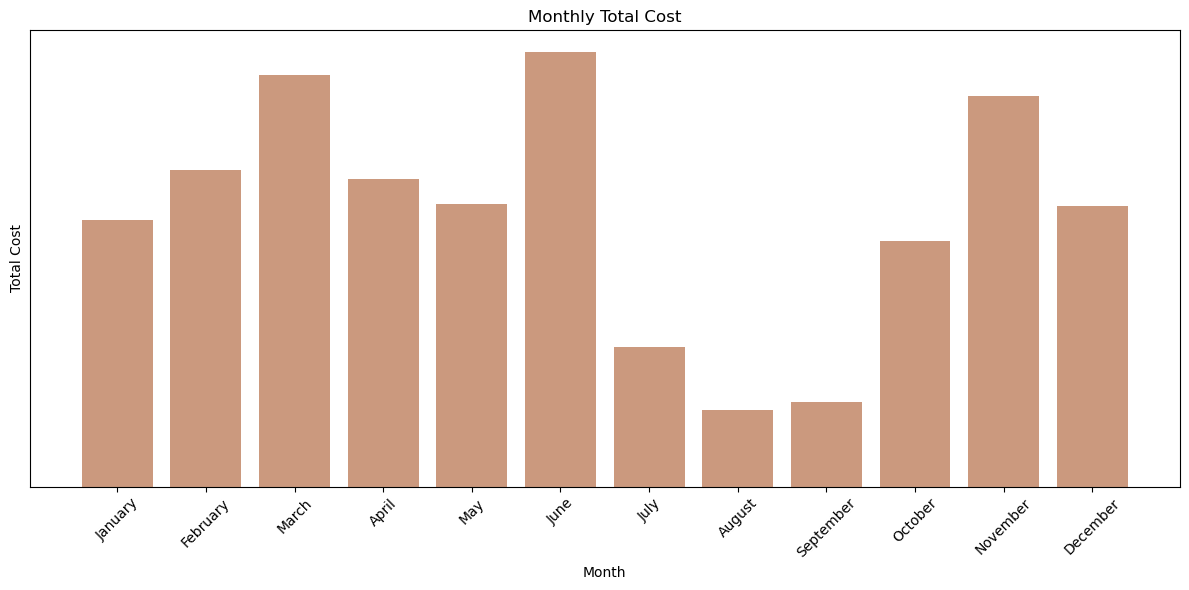

In [59]:
amazon['purchase_date'] = pd.to_datetime(amazon['purchase_date'])
amazon['total_cost'] = amazon['item_price'] + amazon['item_tax'] + amazon['shipping_price'] + amazon['shipping_tax']
amazon['month'] = amazon['purchase_date'].dt.strftime('%B')  # Full month name
monthly_cost = amazon.groupby('month')['total_cost'].sum().reset_index()

# Ensure months are ordered correctly
monthly_cost = monthly_cost.set_index('month').reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
).reset_index()

# Rename columns for clarity
monthly_cost.columns = ['Month', 'Total_Cost']

# Define colors for alternate bars
colors = ['#cb997e']

# Create the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(monthly_cost['Month'], monthly_cost['Total_Cost'], color=colors)


# Add labels and title
plt.title('Monthly Total Cost')
plt.xlabel('Month')
plt.ylabel('Total Cost')

# Customize plot appearance
plt.grid(False)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks([])  # Optional: Remove y-axis ticks if not needed

# Show the plot
plt.tight_layout()
plt.show()


In [60]:
print(monthly_cost)

        Month  Total_Cost
0     January  4713735.70
1    February  5599008.99
2       March  7289207.61
3       April  5448602.87
4         May  4992102.93
5        June  7689255.07
6        July  2471982.58
7      August  1346649.62
8   September  1493674.87
9     October  4343499.70
10   November  6908782.61
11   December  4958553.27


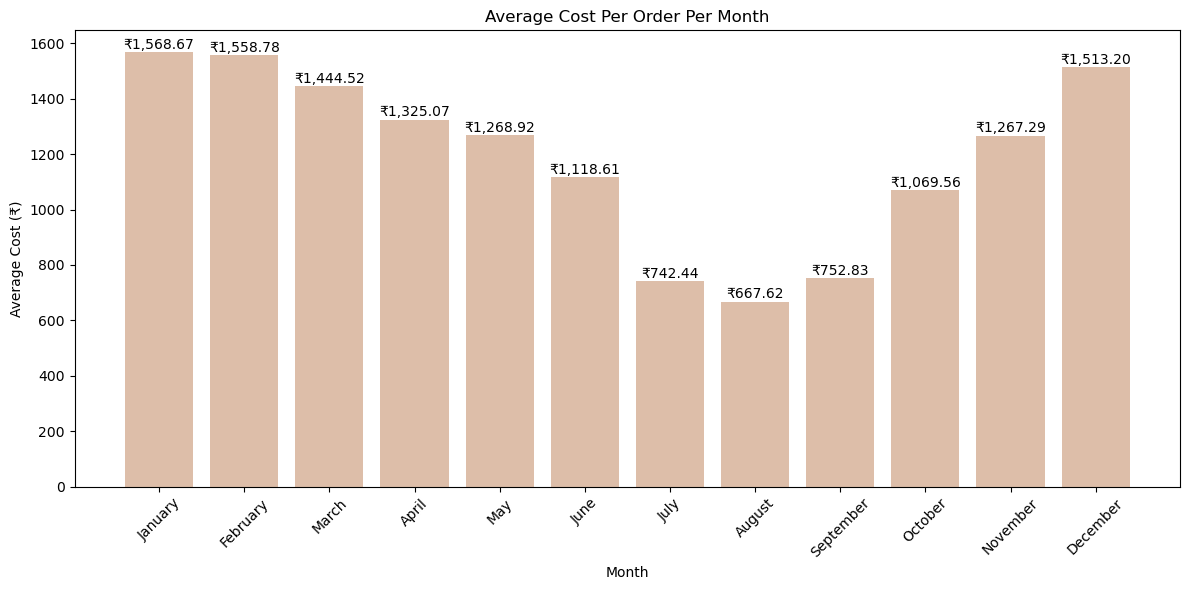

,Month,Average Cost
0,January,"₹1,568.67"
1,February,"₹1,558.78"
2,March,"₹1,444.52"
3,April,"₹1,325.07"
4,May,"₹1,268.92"
5,June,"₹1,118.61"
6,July,₹742.44
7,August,₹667.62
8,September,₹752.83
9,October,"₹1,069.56"


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define columns to convert to numeric
columns_to_convert = [
    'item_price', 'item_tax', 'shipping_price', 'shipping_tax',
    'gift_wrap_price', 'gift_wrap_tax', 'item_promotion_discount', 'ship_promotion_discount'
]

# Convert columns to numeric
for column in columns_to_convert:
    amazon[column] = pd.to_numeric(amazon[column], errors='coerce')

# Calculate total cost
amazon['total_cost'] = (
    amazon['item_price'] +
    amazon['item_tax'] +
    amazon['shipping_price'] +
    amazon['shipping_tax'] +
    amazon['gift_wrap_price'] +
    amazon['gift_wrap_tax'] -
    amazon['item_promotion_discount'] -
    amazon['ship_promotion_discount']
)

# Convert purchase_date to datetime
amazon['purchase_date'] = pd.to_datetime(amazon['purchase_date'])

# Extract month from purchase_date
amazon['purchase_month'] = amazon['purchase_date'].dt.strftime('%B')

# Group by month and sum total_cost
monthly_total_cost = amazon.groupby('purchase_month')['total_cost'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Count orders per month
monthly_orders = amazon['purchase_month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Calculate average cost per month
average_cost_per_month = monthly_total_cost / monthly_orders

# Create DataFrame for plotting
average_cost_per_month_df = average_cost_per_month.reset_index()
average_cost_per_month_df.columns = ['Month', 'Average Cost']

# Define colors for alternating bars
colors = ['#ddbea9']

# Create bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(average_cost_per_month_df['Month'], average_cost_per_month_df['Average Cost'], color=colors)

# Add labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'₹{yval:,.2f}', ha='center', va='bottom', fontsize=10)

# Customize plot appearance
plt.title('Average Cost Per Order Per Month')
plt.xlabel('Month')
plt.ylabel('Average Cost (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display styled table
def highlight_rows(s):
    return ['background-color: #ddbea9'] * len(s)  # Apply color to all rows

styled_table = average_cost_per_month_df.style.apply(highlight_rows, axis=1).format({
    'Average Cost': '₹{:,.2f}'
}).set_properties(**{'color': 'black'})

styled_table


In [62]:
amazon.dtypes

purchase_date               datetime64[ns]
last_updated_date           datetime64[ns]
order_status                        object
fulfillment_channel                 object
sales_channel                       object
ship_service_level                  object
product_name                        object
quantity                            object
currency                            object
item_price                         float64
item_tax                           float64
shipping_price                     float64
shipping_tax                       float64
gift_wrap_price                      int64
gift_wrap_tax                        int64
item_promotion_discount            float64
ship_promotion_discount            float64
ship_city                           object
ship_state                          object
ship_postal_code                    object
is_business_order                   object
account_id                         float64
Product_name                        object
delivery_ti

In [63]:
amazon.to_csv('updated_amazon.csv')

In [64]:
amazon.dtypes

purchase_date               datetime64[ns]
last_updated_date           datetime64[ns]
order_status                        object
fulfillment_channel                 object
sales_channel                       object
ship_service_level                  object
product_name                        object
quantity                            object
currency                            object
item_price                         float64
item_tax                           float64
shipping_price                     float64
shipping_tax                       float64
gift_wrap_price                      int64
gift_wrap_tax                        int64
item_promotion_discount            float64
ship_promotion_discount            float64
ship_city                           object
ship_state                          object
ship_postal_code                    object
is_business_order                   object
account_id                         float64
Product_name                        object
delivery_ti

Top 5 States by Number of Orders:
Index(['UTTAR PRADESH', 'MAHARASHTRA', 'DELHI', 'KARNATAKA', 'TELANGANA'], dtype='object', name='ship_state')


<Figure size 1200x800 with 0 Axes>

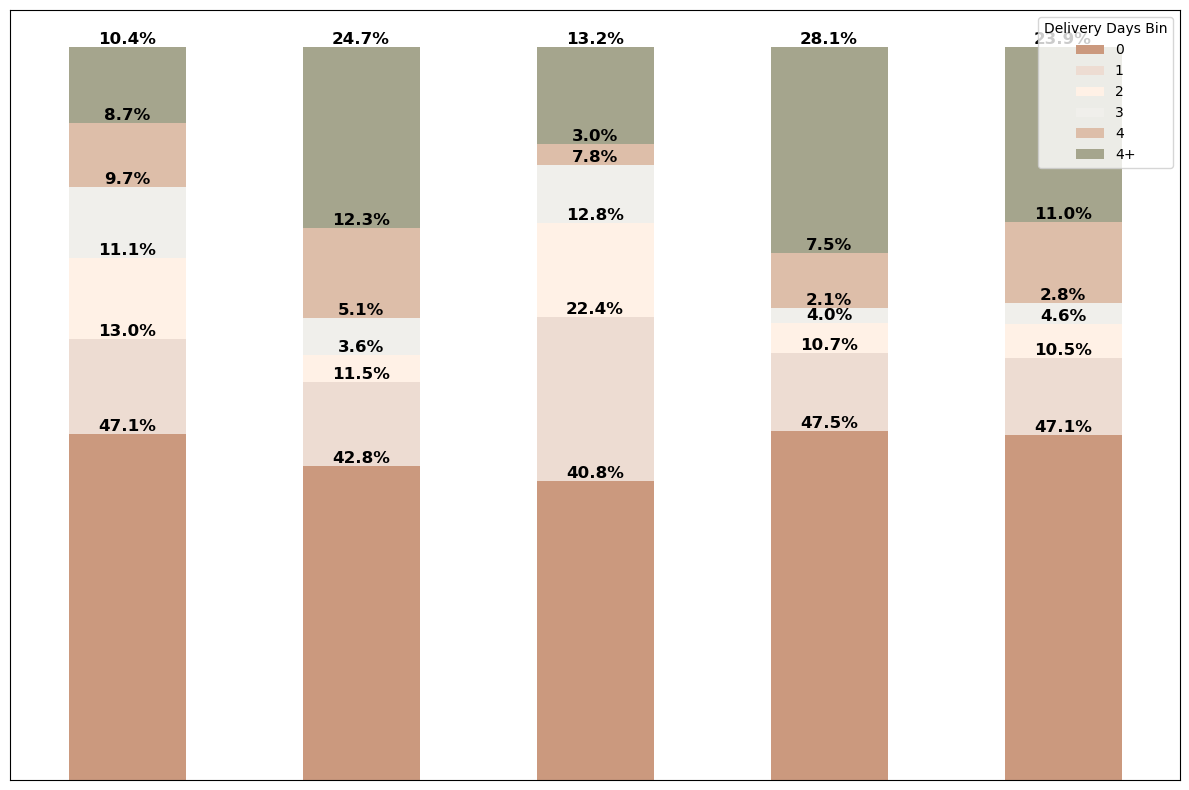

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'amazon' is your DataFrame

# Correct number of bins and labels
bins = [0, 1, 2, 3, 4, 5, float('inf')]  # 6 intervals
labels = ['0', '1', '2', '3', '4', '4+']  # 6 labels corresponding to each interval

# Apply pd.cut with the correct number of labels and bins
amazon['delivery_days_bin'] = pd.cut(amazon['delivery_days'], bins=bins, labels=labels, right=False)

# Step 3: Identify the Top 5 States by Order Count
top_states = amazon['ship_state'].value_counts().nlargest(5).index
print("Top 5 States by Number of Orders:")
print(top_states)

# Step 4: Filter the DataFrame for Top 5 States
amazon_top5 = amazon[amazon['ship_state'].isin(top_states)]

# Step 5: Group by 'ship_state' and 'delivery_days_bin' and count the orders
delivery_by_state_top5 = amazon_top5.groupby(['ship_state', 'delivery_days_bin']).size().unstack(fill_value=0)

# Optional: Ensure the order of the states in the plot matches the top states
delivery_by_state_top5 = delivery_by_state_top5.reindex(top_states)

# Step 6: Calculate percentages
delivery_by_state_top5_percentage = delivery_by_state_top5.div(delivery_by_state_top5.sum(axis=1), axis=0) * 100

# Step 7: Define the custom color palette
colors = ['#cb997e', '#eddcd2', '#fff1e6', '#f0efeb', '#ddbea9', '#a5a58d']

# Step 8: Plot the Stacked Bar Chart
plt.figure(figsize=(12, 8))
ax = delivery_by_state_top5_percentage.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)

# Add percentages inside the bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # Only display percentages for non-zero heights
            ax.annotate(f'{height:.1f}%', 
                        xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height), 
                        ha='center', va='bottom', fontsize=12, weight='bold')

# Add labels and title
plt.title('', fontsize=16)
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=12)
plt.xticks([])
plt.yticks([])
plt.legend(title='Delivery Days Bin')

# Improve layout and display the plot
plt.tight_layout()
plt.show()
